In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

In [10]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
len(x_train),len(x_test)

(60000, 10000)

(<matplotlib.image.AxesImage at 0x7f5fd59c1060>, 5)

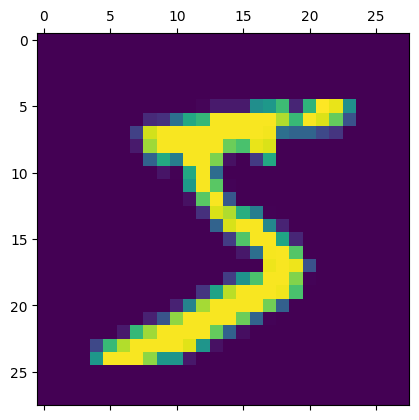

In [12]:
plt.matshow(x_train[0]),y_train[0]

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
# if not using Flattern layer in model use this
# x_train_flattern=x_train.reshape(len(x_train),28*28)
# x_test_flattern=x_test.reshape(len(x_test),28*28)

# x_test_flattern.shape

In [16]:
model =keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(100,input_shape=(784,),activation='relu'),
   keras.layers.Dense(10,activation='sigmoid')
])

/home/vikram/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/vikram/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5


I0000 00:00:1721975619.004591    5210 service.cc:146] XLA service 0x7f5ea000b5e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721975619.004668    5210 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-07-26 12:03:39.022643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-26 12:03:39.095048: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 140/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6337 - loss: 1.2596

I0000 00:00:1721975620.053066    5210 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8702 - loss: 0.4569
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9601 - loss: 0.1363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9731 - loss: 0.0899
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9846 - loss: 0.0510


In [18]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.0994


[0.08811987191438675, 0.9739999771118164]

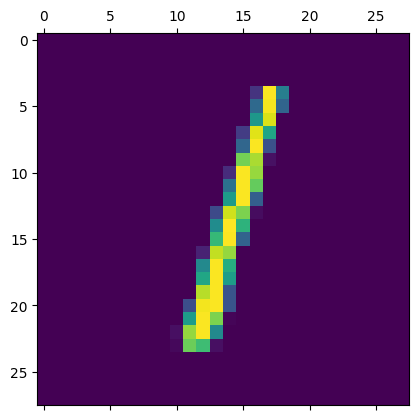

In [19]:
plt.matshow(x_test[2])

In [20]:
y_predict = model.predict(x_test)
y_predict[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0.00770292, 0.9990134 , 0.4155439 , 0.01027275, 0.02083407,
       0.00988053, 0.01999055, 0.64006287, 0.7669388 , 0.04410654],
      dtype=float32)

In [21]:
np.argmax(y_predict[2])

1

In [22]:
y_predicted_labels=[np.argmax(i)for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(50.722222222222214, 0.5, 'Truth')

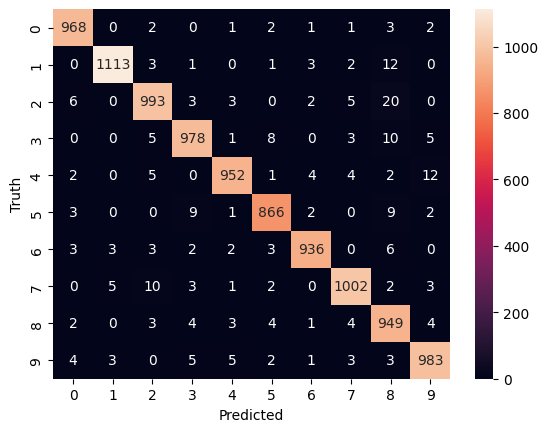

In [25]:
plt.Figure(figsize=(10,7))
sn.heatmap(cm,annot=True ,fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model.save("Digit_Recog.h5",save_format='h5')

In [27]:
# Load the entire model
from tensorflow.keras.models import load_model

model_l = load_model("Digit_Recog.h5")

model_l.predict(x_test)[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0.00770292, 0.9990134 , 0.4155439 , 0.01027275, 0.02083407,
       0.00988053, 0.01999055, 0.64006287, 0.7669388 , 0.04410654],
      dtype=float32)